<a href="https://colab.research.google.com/github/ORCT/ds-section2-project/blob/main/03.%20Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

#### 3. 시각화

- 앞으로 신규카트는 V1 엔진만 출시할 것이므로 V1 엔진만을 남기고 모두 드랍
- 너무 매치 수가 차이나는 트랙은 삭제(100회 미만)
- 각 카트의 트랙별 평균 시간 확인


In [2]:
import pandas as pd

df = pd.read_csv('data_fin.csv')
df

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
3,Color맥라렌/1,차이나 라사,Color옴팡이,4.0,111.98,멘티스 X,1015.0,1009.0,1037.0,840.0,700.0
4,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
11130,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11131,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11132,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
11133,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Match_Id  11135 non-null  object 
 1   Track     11135 non-null  object 
 2   Name      11135 non-null  object 
 3   Rank      11135 non-null  float64
 4   Time      11135 non-null  float64
 5   Kart      11135 non-null  object 
 6   드리프트      11135 non-null  float64
 7   가속력       11135 non-null  float64
 8   코너링       11135 non-null  float64
 9   부스터시간     11135 non-null  float64
 10  부스터충전량    11135 non-null  float64
dtypes: float64(7), object(4)
memory usage: 957.0+ KB


In [4]:
df.Kart.value_counts()

렉키 V1         3017
스펙터 V1        1290
파이어 마라톤 V1     993
플라즈마 V1        981
나이트 세이버 V1     689
프로토 바이크 V1     500
어벤저 V1         494
그믐 산군 V1       399
파라곤 X          398
카본 비트 V1       298
비트 V1          200
아이언 솔리드 V1     198
멘티스 X          198
크롬 버스트 V1      196
폭스 V1          195
흰 소 X          100
파라곤 9          100
경찰차 V1         100
블랙 코튼 V1       100
황금 미술 붓 X      100
태극 V1          100
이온 V1          100
골든 파라곤 X        99
몬스터 X LE        98
크로노스 X          97
렉키 X            95
Name: Kart, dtype: int64

In [5]:
df_no_retire = df[df['Time'] != 999.99]
df_no_retire

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
3,Color맥라렌/1,차이나 라사,Color옴팡이,4.0,111.98,멘티스 X,1015.0,1009.0,1037.0,840.0,700.0
4,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
11130,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11131,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11132,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
11133,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


In [6]:
df_no_retire.describe()

,Rank,Time,드리프트,가속력,코너링,부스터시간,부스터충전량
count,10044.000000,10044.000000,10044.000000,10044.000000,10044.000000,10044.000000,10044.000000
mean,2.584429,96.349559,1037.097172,1037.286241,974.386101,897.466945,684.860613
std,1.083463,21.246252,41.428939,43.690688,40.797161,95.034762,162.640117
min,1.000000,61.720000,900.000000,795.000000,875.000000,780.000000,490.000000
25%,2.000000,78.190000,1015.000000,1020.000000,960.000000,780.000000,530.000000
50%,3.000000,95.760000,1020.000000,1020.000000,965.000000,910.000000,600.000000
75%,4.000000,110.730000,1060.000000,1057.000000,1005.000000,1000.000000,880.000000
max,4.000000,143.610000,1105.000000,1105.000000,1075.000000,1053.000000,880.000000


In [7]:
df_v1 = df_no_retire[df_no_retire['Kart'].str.contains('V1')]
df_v1.Kart.value_counts()

렉키 V1         2914
스펙터 V1        1092
플라즈마 V1        981
파이어 마라톤 V1     894
나이트 세이버 V1     689
프로토 바이크 V1     500
어벤저 V1         494
그믐 산군 V1       399
카본 비트 V1       200
비트 V1          200
아이언 솔리드 V1     198
크롬 버스트 V1      196
태극 V1          100
이온 V1          100
폭스 V1           95
Name: Kart, dtype: int64

In [8]:
df_v1.Track.value_counts()

빌리지 고가의 질주            399
네모 산타의 비밀공간           379
월드 리오 다운힐             363
월드 뉴욕 대질주             357
차이나 라사                357
                     ... 
포레스트 골짜기                2
[Reverse] 아이스 펭귄타운      2
공동묘지 마왕의 초대             2
신화 차원의 관문               2
1920 기차역 질주             2
Name: Track, Length: 99, dtype: int64

In [9]:
popular_track = df_v1['Track'].value_counts().loc[lambda x : x >= 100]
popular_track.index
df_fin = df_v1[df_v1['Track'].isin(popular_track.index)]
df_fin

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
4,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
5,Color맥라렌/2,네모 장난감 선물공장,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
11130,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11131,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
11132,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
11133,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


In [10]:
df_fin['sum_spec'] = df_fin['드리프트'] + df_fin['가속력'] + df_fin['코너링'] + df_fin['부스터시간'] + df_fin['부스터충전량']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


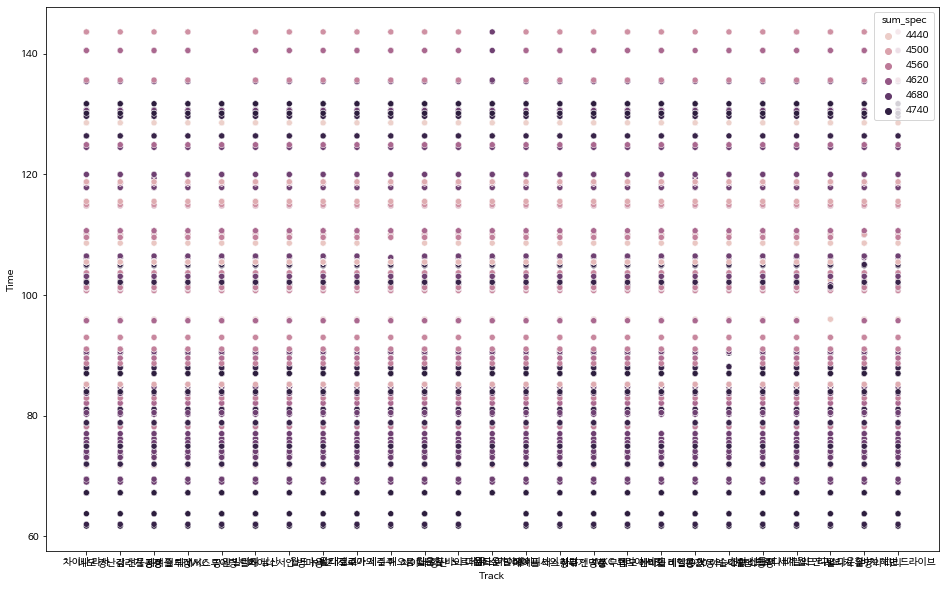

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(16,10))
sns.scatterplot(x='Track', y='Time', hue='sum_spec', data=df_fin)


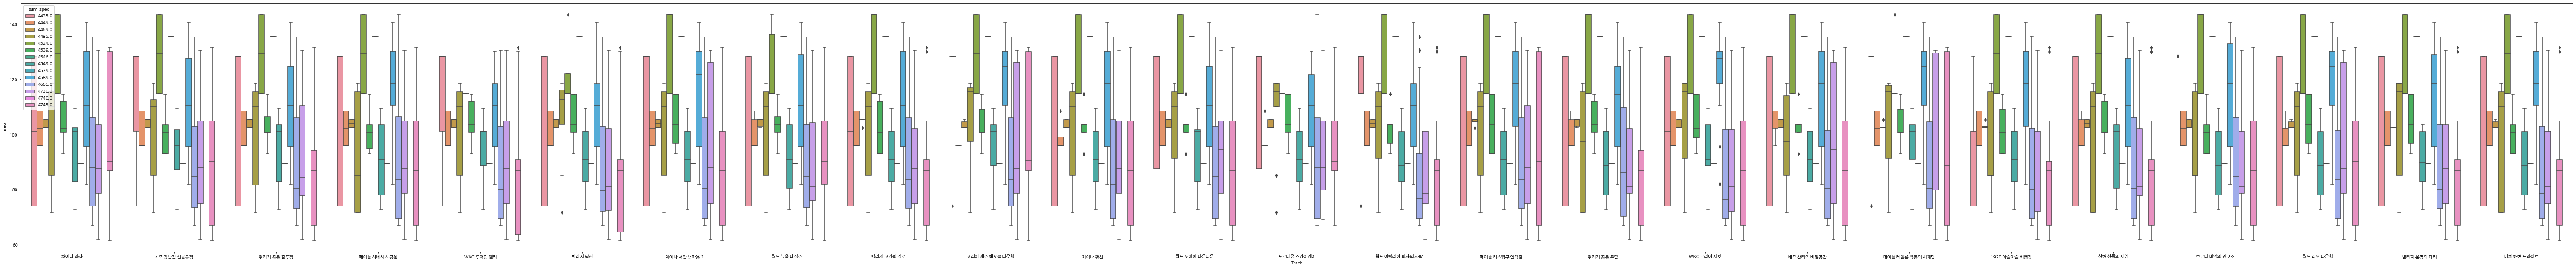

In [13]:
plt.figure(figsize=(100,10))
sns.boxplot(x='Track', y='Time', hue='sum_spec', data=df_fin)